In [1]:
library(ggplot2)
library(platetools)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”


In [2]:
plate_map_path <- file.path("../../../data/processed/platemaps/wave1_plate_map.csv")
platemap_path <- file.path("../figures/plate_map.png")
if (!file.exists("../figures/")) dir.create("../figures/")
file.path("../figures/")
plate_map <- read.csv(plate_map_path)
head(plate_map)

[1] "../figures/"

,Metadata_well,Metadata_treatment,Metadata_treatment1,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,Metadata_treatment2_unit,Metadata_serum
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,C04,Media,Media,,,,,,FBS
2,C05,DMSO CTL,DMSO,,CTL,,,,FBS
3,C06,Media,Media,,,,,,FBS
4,C07,DMSO CTL,DMSO,,CTL,,,,FBS
5,C08,Media,Media,,,,,,FBS
6,C09,DMSO CTL,DMSO,,CTL,,,,FBS


In [3]:
unique(plate_map$Metadata_treatment)
plate_map$Metadata_treatment <- factor(plate_map$Metadata_treatment, levels = c(
    'Media',
    'DMSO CTL',
    'no Hoechst',

    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 10 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 3uM',
    'LPS 1 ug/ml + Nigericin 5uM',

    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',

    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',

    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM'
))
unique(plate_map$Metadata_treatment)


[1] "Media"                          "DMSO CTL"                      
 [3] "LPS 10 ug/ml"                   "Thapsigargin 10 uM"            
 [5] "LPS 1 ug/ml"                    "Thapsigargin 1 uM"             
 [7] "LPS 0.1 ug/ml"                  "Thapsigargin 0.5uM"            
 [9] "LPS 1 ug/ml + ATP 2.5 mM"       "LPS 1 ug/ml + Nigericin 5uM"   
[11] "Flagellin 10 ug/ml"             "LPS 1 ug/ml + Nigericin 3uM"   
[13] "Flagellin 1 ug/ml"              "LPS 1 ug/ml + Nigericin 1 uM"  
[15] "Flagellin 0.1 ug/ml"            "LPS 1 ug/ml + Nigericin 0.5uM" 
[17] "H2O2 500 uM"                    "LPS 1 ug/ml + Nigericin 0.1 uM"
[19] "H2O2 100 uM"                    "Ab1-42 10 uM"                  
[21] "H2O2 100 nM"                    "Ab1-42 2 uM"                   
[23] "no Hoechst"                     "Ab1-42 0.4 uM"

[1] Media                          DMSO CTL                      
 [3] LPS 10 ug/ml                   Thapsigargin 10 uM            
 [5] LPS 1 ug/ml                    Thapsigargin 1 uM             
 [7] LPS 0.1 ug/ml                  Thapsigargin 0.5uM            
 [9] LPS 1 ug/ml + ATP 2.5 mM       LPS 1 ug/ml + Nigericin 5uM   
[11] Flagellin 10 ug/ml             LPS 1 ug/ml + Nigericin 3uM   
[13] Flagellin 1 ug/ml              LPS 1 ug/ml + Nigericin 1 uM  
[15] Flagellin 0.1 ug/ml            LPS 1 ug/ml + Nigericin 0.5uM 
[17] H2O2 500 uM                    LPS 1 ug/ml + Nigericin 0.1 uM
[19] H2O2 100 uM                    Ab1-42 10 uM                  
[21] H2O2 100 nM                    Ab1-42 2 uM                   
[23] no Hoechst                     Ab1-42 0.4 uM                 
24 Levels: Media DMSO CTL no Hoechst LPS 0.1 ug/ml LPS 1 ug/ml ... Ab1-42 10 uM

In [4]:
colorgrad1 <- colorRampPalette(c("lightgrey", "grey"))(3)
# col 2 - 5 hues color ramp 5 hues
colorgrad2 <- colorRampPalette(c("pink", "darkred"))(11)
# col 3 - 3 hues
colorgrad3 <- colorRampPalette(c("yellow", "brown"))(3)
# col 4 - 3 hues
colorgrad4 <- colorRampPalette(c("lightblue", "darkblue"))(6)
# col 5 - 2 hues
colorgrad5 <- colorRampPalette(c("lightgreen", "darkgreen"))(3)
# col 6 - 3 hues
colorgrad6 <- colorRampPalette(c("purple", "#2e004b"))(3)
# col 7 - 2 hues
colorgrad7 <- colorRampPalette(c("cyan", "darkcyan"))(4)
# col 8 - 2 hues
colorgrad8 <- colorRampPalette(c("#ebb676", "darkorange"))(3)
# col 9 - 3 hues
colorgrad9 <- colorRampPalette(c("magenta", "#833b83"))(3)

In [5]:

# define the colors
colors <- c(
    'Media' = colorgrad1[1],
    'DMSO CTL' = colorgrad1[2],
    'no Hoechst' = colorgrad1[3],

    'LPS 0.1 ug/ml' = colorgrad2[1],
    'LPS 1 ug/ml' = colorgrad2[2],
    'LPS 10 ug/ml' = colorgrad2[3],
    'LPS 1 ug/ml + ATP 2.5 mM' = colorgrad2[4],
    'LPS 1 ug/ml + Nigericin 0.1 uM' = colorgrad2[5],
    'LPS 1 ug/ml + Nigericin 0.5uM' = colorgrad2[6],
    'LPS 1 ug/ml + Nigericin 1 uM' = colorgrad2[7],
    'LPS 1 ug/ml + Nigericin 3uM' = colorgrad2[8],
    'LPS 1 ug/ml + Nigericin 5uM' = colorgrad2[9],

    'Flagellin 0.1 ug/ml' = colorgrad5[1],
    'Flagellin 1 ug/ml' = colorgrad5[2],
    'Flagellin 10 ug/ml' = colorgrad5[3],

    'Thapsigargin 0.5uM' = colorgrad8[1],
    'Thapsigargin 1 uM' = colorgrad8[2],
    'Thapsigargin 10 uM' = colorgrad8[3],
    
    'H2O2 100 nM' = colorgrad7[1],
    'H2O2 100 uM' = colorgrad7[2],
    'H2O2 500 uM' = colorgrad7[3],

    'Ab1-42 0.4 uM' = colorgrad4[1],
    'Ab1-42 2 uM' = colorgrad4[2],
    'Ab1-42 10 uM' = colorgrad4[3]
)

     


Warning message:
“Warning: Your well label count ( 96 ) covers less than half the selected plate( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


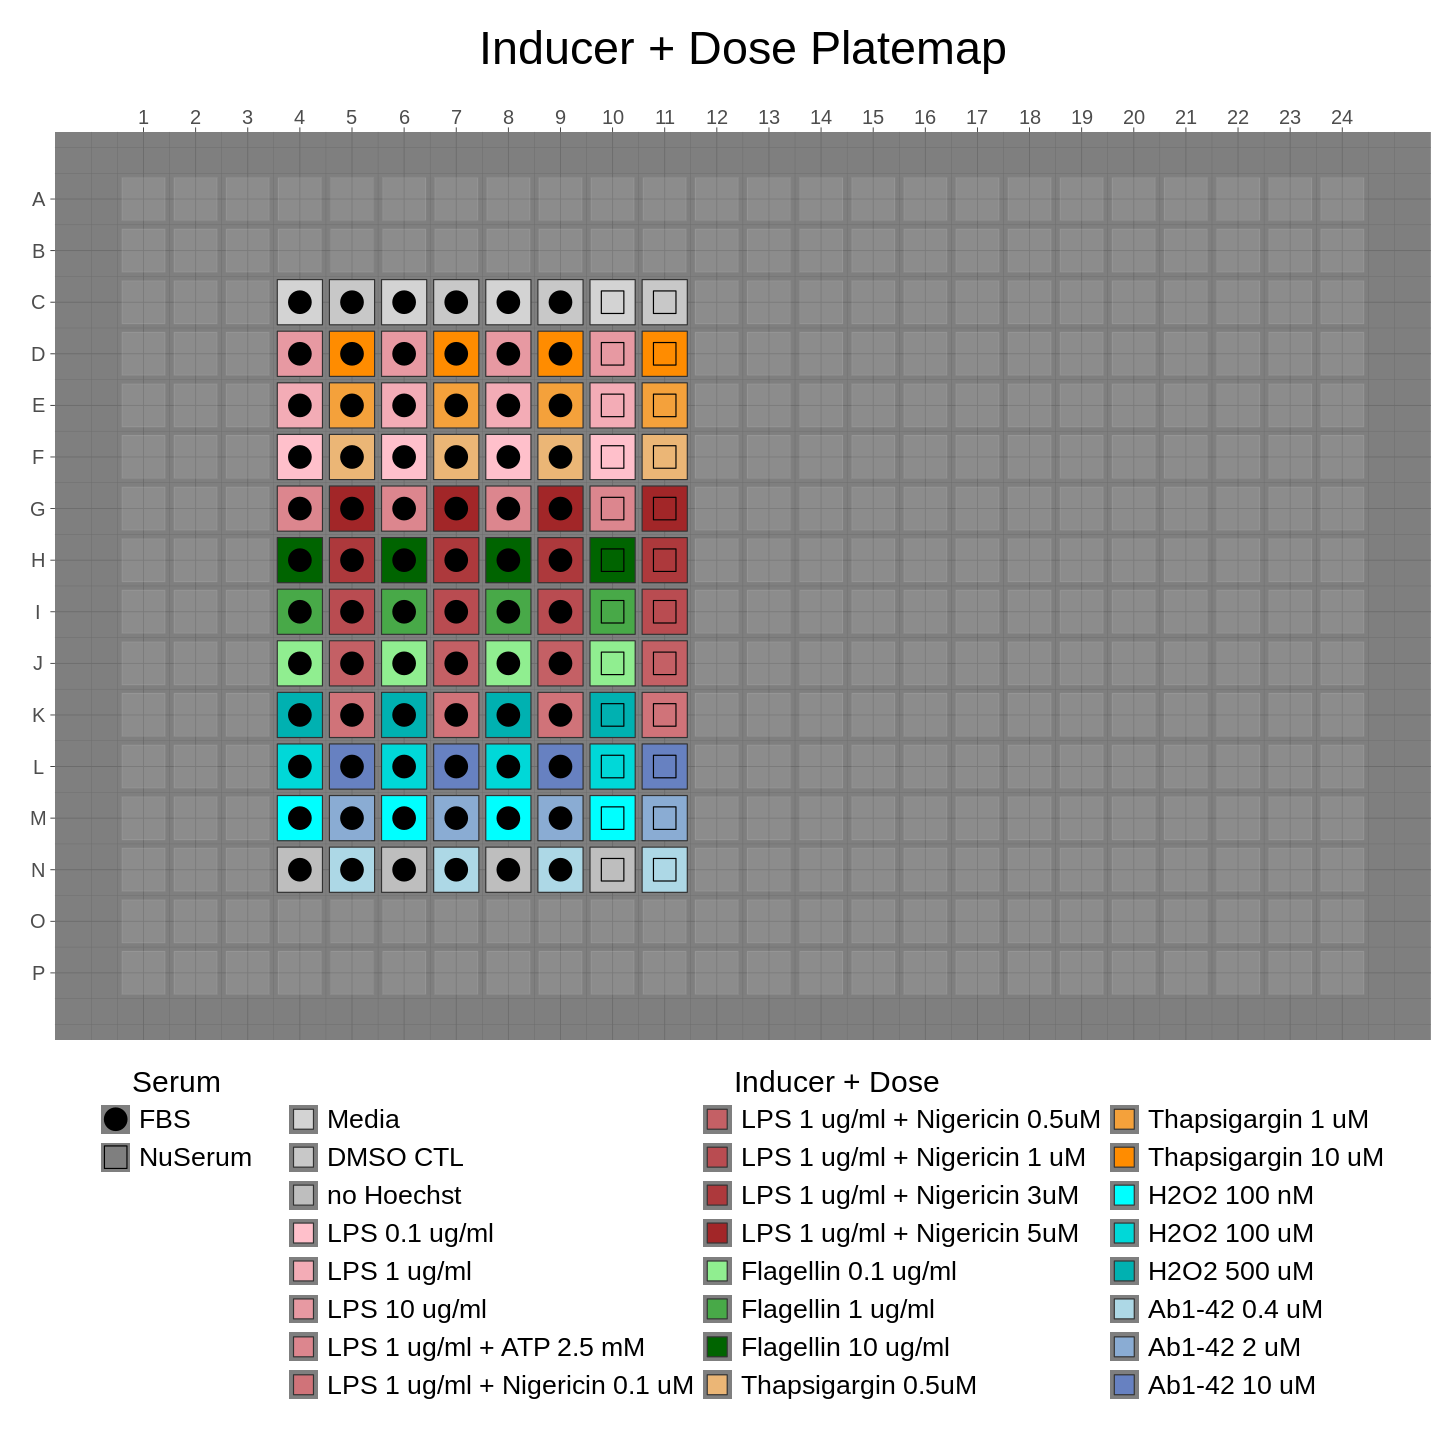

In [6]:
width <- 12
height <- 12
options(repr.plot.width = width, repr.plot.height = height)
platemap_plot_inducer_dose <- (
    raw_map(
        data = plate_map$Metadata_treatment,
        well = plate_map$Metadata_well,
        plate = 384,
        size = 14)
    + theme_dark() 
    + ggplot2::geom_point(
            aes(shape = plate_map$Metadata_serum),
            size = 6
            )

    + scale_shape_manual(
        values = c(
            'NuSerum' = 0,
            'FBS' = 19
        )
    )
    + scale_fill_manual(
    values = colors
    )

    + labs(fill = "Inducer + Dose", shape = "Serum")
    + theme(legend.position = "bottom", legend.title.position = "top")
    + guides(fill = guide_legend(override.aes = list(size = 6),nrow = 8))
    + guides(shape = guide_legend(override.aes = list(size = 6),ncol = 1))

    + theme(
        legend.title = element_text(size = 18,hjust = 0.5),
        legend.text = element_text(size = 16)
    )
    + ggtitle("Inducer + Dose Platemap")
    + theme(plot.title = element_text(size = 28, hjust = 0.5))
    + theme(axis.text.x = element_text(size = 12,vjust = 0.5, hjust=0.5))
    + theme(axis.text.y = element_text(size = 12, vjust = 0.5, hjust=0.5))
    
)
ggsave(platemap_path, platemap_plot_inducer_dose, width=width, height=height, dpi=600)
platemap_plot_inducer_dose